<a href="https://colab.research.google.com/github/crossboww/Machine_Learning/blob/main/ML_Projects/Big_Mart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
#Importing the Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRFRegressor, XGBRegressor
from sklearn import metrics

#Data Collection and Analysis

In [119]:
#Loading the dataset from CSV file to a Pandas DataFrame
sales_data = pd.read_csv('big_mart_data.csv')

In [120]:
#First 5 Rowsa of Dataframe
sales_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [121]:
#Number of DataPoints and Features
sales_data.shape

(8523, 12)

In [122]:
#Getting some information about Datases
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:



*   Item_Identifier
*   Item_Fat_Content


*   Item_Type
*   Outlet_Identifier


*   Outlet_Size
*   Outlet_Type

*   Outlet_Location_Type















In [123]:
#Check for Missing Values
sales_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


#Handling the Missing Values

So,here we are going to handle missing values by replacing the values of Mean and Mode values called imputation.

for, Item_Weight columns we are using Mean---->( Averaging the values ) cx it's Numerical values so, it can be easy to replace.

For, Outlet_Size columns we are using Mode----->( Most repeated vaues ) cz it's Categorical values so, it can be easy to replace.




In [124]:
#Mean Value of "Item_Weight" Columns
sales_data['Item_Weight'].mean()

np.float64(12.857645184135976)

In [125]:
# Filling the Missing values in "Item_Weight" Columns with Mean values
sales_data['Item_Weight'].fillna(sales_data['Item_Weight'].mean(), inplace=True)

/tmp/ipython-input-524518439.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_data['Item_Weight'].fillna(sales_data['Item_Weight'].mean(), inplace=True)


In [126]:
sales_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


Now, We are Replacing the Mode values with NAN in "Outlet_Size" Columns

In [127]:
Mode_of_outlet_size = sales_data.pivot_table(values="Outlet_Size", columns="Outlet_Type", aggfunc=(lambda x: x.mode()[0]))
print(Mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size         Small             Small            Medium            Medium


In [128]:
missing_value = sales_data['Outlet_Size'].isnull()
print(missing_value)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [129]:
missing_value = sales_data['Outlet_Size'].isnull()
# Create a mapping series from Mode_of_outlet_size
outlet_size_mapping = Mode_of_outlet_size.iloc[0]
# Apply the mapping to fill missing Outlet_Size values
sales_data.loc[missing_value, 'Outlet_Size'] = sales_data.loc[missing_value, 'Outlet_Type'].map(outlet_size_mapping)

In [130]:
#Checking if Missing Values handle or not
sales_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


#Data Analysis and Insights

In [131]:
sales_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


For, Numerical Features

In [132]:
sns.set()

/tmp/ipython-input-2823936611.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Item_Weight'])


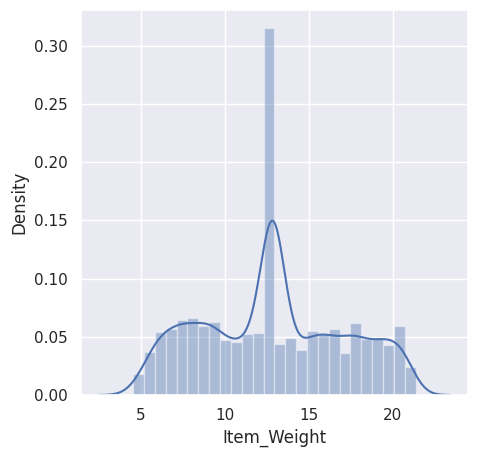

In [133]:
#Item_Weight Columns Distribution
plt.figure(figsize=(5,5))
sns.distplot(sales_data['Item_Weight'])
plt.show()


/tmp/ipython-input-2860510548.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Item_Visibility'])


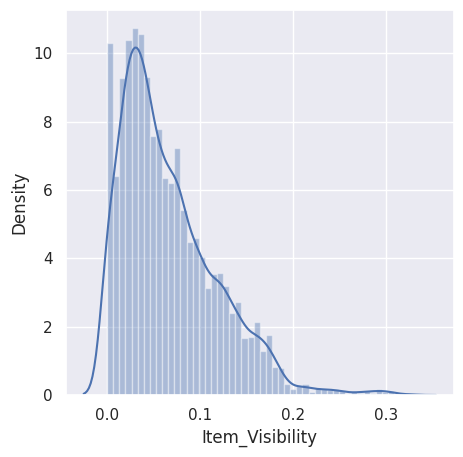

In [134]:
#Item_Visibility 	 Columns Distribution
plt.figure(figsize=(5,5))
sns.distplot(sales_data['Item_Visibility'])
plt.show()


/tmp/ipython-input-1113217579.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Item_MRP'])


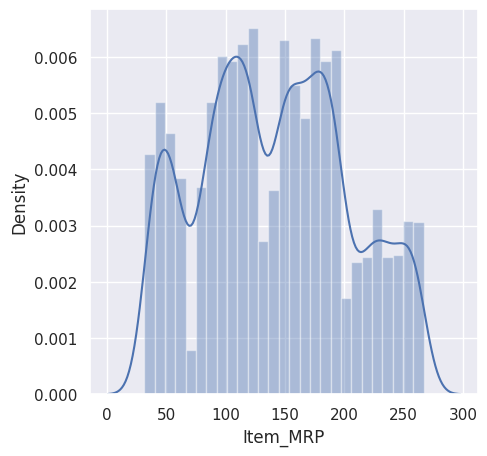

In [135]:
#Item_MRP Columns Distribution
plt.figure(figsize=(5,5))
sns.distplot(sales_data['Item_MRP'])
plt.show()


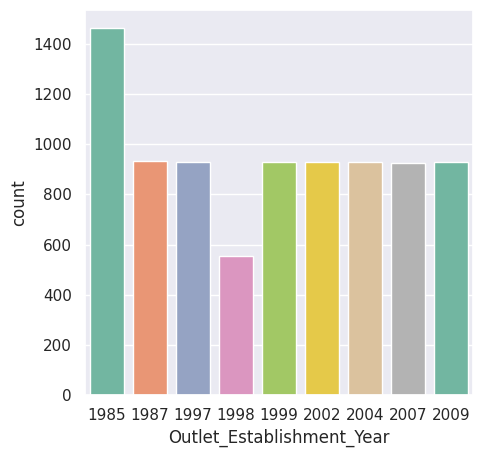

In [136]:
#Outlet_Establishment_Year Columns
plt.figure(figsize=(5,5))
sns.countplot(x='Outlet_Establishment_Year',data= sales_data, hue= 'Outlet_Establishment_Year', palette='Set2', legend=False)
plt.show()

For, Categorical Features

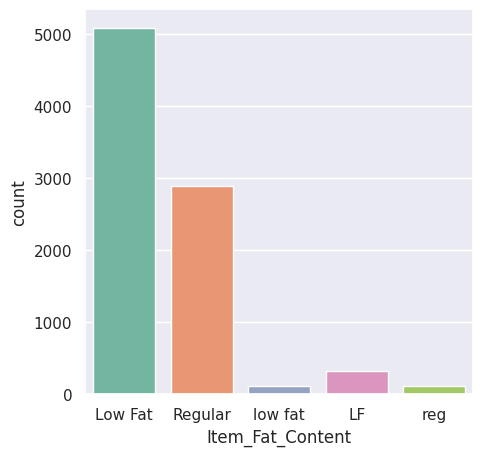

In [137]:
#Item_Fat_Content Columns
plt.figure(figsize=(5,5))
sns.countplot(
    x='Item_Fat_Content',
    data=sales_data,
    hue='Item_Fat_Content',
    palette='Set2',
    legend=False
)
plt.show()


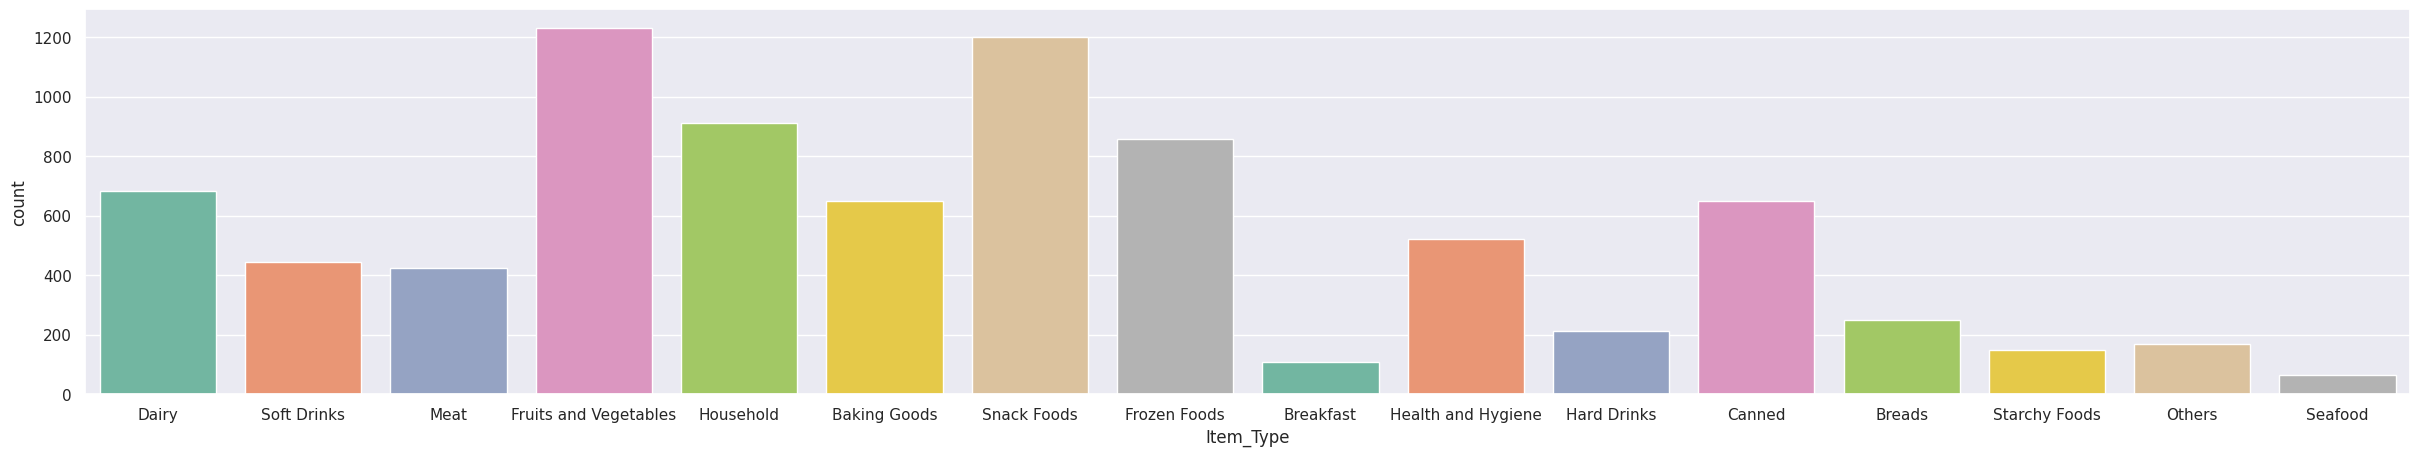

In [138]:
#Item_Type Columns
plt.figure(figsize=(30,5))
sns.countplot(
    x='Item_Type',
    data=sales_data,
    hue='Item_Type',
    palette='Set2',
    legend=False
)
plt.show()


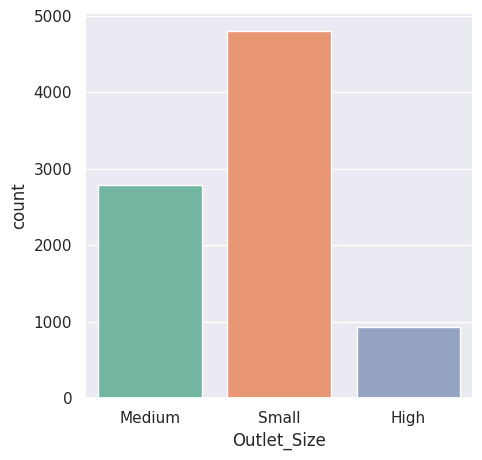

In [139]:
#Outlet_Size Columns
plt.figure(figsize=(5,5))
sns.countplot(
    x='Outlet_Size',
    data=sales_data,
    hue='Outlet_Size',
    palette='Set2',
    legend=False
)
plt.show()

#Data pre-Processing

In [140]:
sales_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [141]:
sales_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


So, here we are replcing the "LF", "reg", and "low fat" as Coressponding
"Low Fat" and "Regular"

In [142]:
sales_data['Item_Fat_Content'].replace({'LF' : 'Low Fat', 'reg' : 'Regular', 'low fat' : 'Low Fat'}, inplace=True)

/tmp/ipython-input-1214440257.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_data['Item_Fat_Content'].replace({'LF' : 'Low Fat', 'reg' : 'Regular', 'low fat' : 'Low Fat'}, inplace=True)


In [143]:
sales_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


#Label Encoding

In [144]:
label = LabelEncoder()

In [145]:
#Label Encoding for Categorical Data columns
sales_data['Item_Identifier'] = label.fit_transform(sales_data['Item_Identifier'])

sales_data['Item_Fat_Content'] = label.fit_transform(sales_data['Item_Fat_Content'])
sales_data['Item_Type'] = label.fit_transform(sales_data['Item_Type'])
sales_data['Outlet_Identifier'] = label.fit_transform(sales_data['Outlet_Identifier'])
sales_data['Outlet_Size'] = label.fit_transform(sales_data['Outlet_Size'])
sales_data['Outlet_Type'] = label.fit_transform(sales_data['Outlet_Type'])
sales_data['Outlet_Location_Type'] = label.fit_transform(sales_data['Outlet_Location_Type'])



In [146]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


#Splitting the Dataset into Features and Target columns

In [147]:
x = sales_data.drop(columns = 'Item_Outlet_Sales', axis=1)
y = sales_data['Item_Outlet_Sales']

In [148]:
print(x)
print(y)

      Item_Identifier  Item_Weight  ...  Outlet_Location_Type  Outlet_Type
0                 156        9.300  ...                     0            1
1                   8        5.920  ...                     2            2
2                 662       17.500  ...                     0            1
3                1121       19.200  ...                     2            0
4                1297        8.930  ...                     2            1
...               ...          ...  ...                   ...          ...
8518              370        6.865  ...                     2            1
8519              897        8.380  ...                     1            1
8520             1357       10.600  ...                     1            1
8521              681        7.210  ...                     2            2
8522               50       14.800  ...                     0            1

[8523 rows x 11 columns]
0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4 

#Splitting the Data into Training and Testing Data

In [149]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,  random_state=2)

In [150]:
print(x.shape, x_train.shape, x_test.shape)

(8523, 11) (6818, 11) (1705, 11)


#Training the Machine Learning Model
XGBoost Regressor

In [151]:
model= XGBRegressor()

In [152]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

#Evalaution

In [153]:
#Prediction on Training data
training_data_prediction = model.predict(x_train)

In [158]:
#R Squared Values
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R Squared Value:', round(r2_train*100, 2), "%")

R Squared Value: 87.62 %


In [159]:
#Prediction on Testing data
testing_data_prediction = model.predict(x_test)

In [160]:
#R Squared Values
r2_test = metrics.r2_score(y_test, testing_data_prediction)
print('R Squared Value:', round(r2_test*100, 2), "%")

R Squared Value: 50.17 %
